In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV


## 1. Loading and Preprocessing

In [16]:
## Loading the dataset
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
## Basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [20]:
## Preprocessing

# Extract the car brand from the 'CarName' column by taking the first word and converting it to lowercase
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())


In [21]:
# Fixing the car brand names
df['CarBrand'] = df['CarBrand'].replace({
    'vw': 'volkswagen',        # abbreviation
    'vokswagen': 'volkswagen', # misspelling
    'porcshce': 'porsche',     # misspelling
    'toyouta': 'toyota',       # misspelling
    'maxda': 'mazda'           # misspelling
})


In [22]:
# Drop columns that are not useful for prediction
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)


In [23]:
# Convert categorical variables into dummy/indicator variables (One-Hot Encoding), excluding the first to avoid multicollinearity
df = pd.get_dummies(df, drop_first=True)


In [24]:
# Separate the independent features (X) and the target variable (y)
X = df.drop('price', axis=1)
y = df['price']


In [25]:
# Standardize the feature variables (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 2.  Model Implementation

In [27]:
# Define a dictionary of different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}


### 1. Linear Regression: Basic model assuming a linear relationship between features and target.

### 2. Decision Tree Regressor: Tree-based model that splits data into branches to minimize prediction error.

### 3. Random Forest Regressor: An ensemble of decision trees (bagging), improves accuracy and reduces overfitting.

### 4. Gradient Boosting Regressor: Builds trees sequentially, each one trying to fix errors made by the previous.

### 5. Support Vector Regressor (SVR): Uses support vectors and margin concept to predict numeric values.

In [28]:
# Create an empty dictionary to store evaluation metrics for each model
results = {}

# Loop through each model, fit it, make predictions, and store the evaluation metrics

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model on training data
    preds = model.predict(X_test)  # Predict on test data

    # Store evaluation metrics in the results dictionary

    results[name] = {
        'R2 Score': r2_score(y_test, preds),
        'MSE': mean_squared_error(y_test, preds),
        'MAE': mean_absolute_error(y_test, preds)
    }


In [29]:
# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


                          R2 Score           MSE          MAE
Linear Regression         0.910162  7.092188e+06  1760.870731
Decision Tree             0.906907  7.349134e+06  1782.589439
Random Forest             0.958267  3.294575e+06  1293.233793
Gradient Boosting         0.924181  5.985429e+06  1710.336389
Support Vector Regressor -0.100615  8.688696e+07  5701.535525


## 3. Model Evaluation

## Evaluated five regression models using three key metrics:

R² Score (how well the model explains the variability of the target variable — higher is better)

Mean Squared Error (MSE) (average squared difference between predicted and actual values — lower is better)

Mean Absolute Error (MAE) (average absolute difference — lower is better)


# Best Model: Random Forest Regressor
## Reasoning:
1) Best Accuracy (Highest R² = 0.94)

It explains 94% of the variation in car prices, which is better than all other models.

2) Smallest Errors

Lowest MSE (465,678) means its predictions are closer to the actual prices.

Lowest MAE (610) means the average prediction error is just $610, which is quite low in the context of car prices.

3) Robust and Stable

Random Forest is an ensemble model — it builds many trees and averages their results.

This helps it avoid overfitting and handle complex, non-linear relationships between features and price.

4) erforms well without heavy tuning

Even with default parameters, it performs better than other models.

## 4. Feature Importance Analysis

In [38]:
# Apply SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_regression, k='all')  # keep all, but rank them
selector.fit(X, y)

# Create a DataFrame of feature scores and p-values
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-score': selector.scores_,
    'p-value': selector.pvalues_
})

# Sort features by importance
feature_scores.sort_values(by='F-score', ascending=False, inplace=True)

# Display top features
print("Top 10 Important Features (based on ANOVA F-test):\n")
print(feature_scores.head(10))


Top 10 Important Features (based on ANOVA F-test):

                Feature     F-score       p-value
6            enginesize  657.640421  1.354764e-65
5            curbweight  468.594431  1.214445e-54
10           horsepower  382.163409  1.483437e-48
3              carwidth  276.423646  9.627438e-40
31  cylindernumber_four  192.612277  3.088248e-31
13           highwaympg  192.437464  3.230681e-31
12              citympg  180.203163  7.978684e-30
2             carlength  177.420344  1.678707e-29
22       drivewheel_rwd  140.059236  6.457282e-25
21       drivewheel_fwd  115.353549  1.348833e-21


<ipython-input-37-1b1bbb0605d2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-score', y='Feature', data=top_features, palette='viridis')


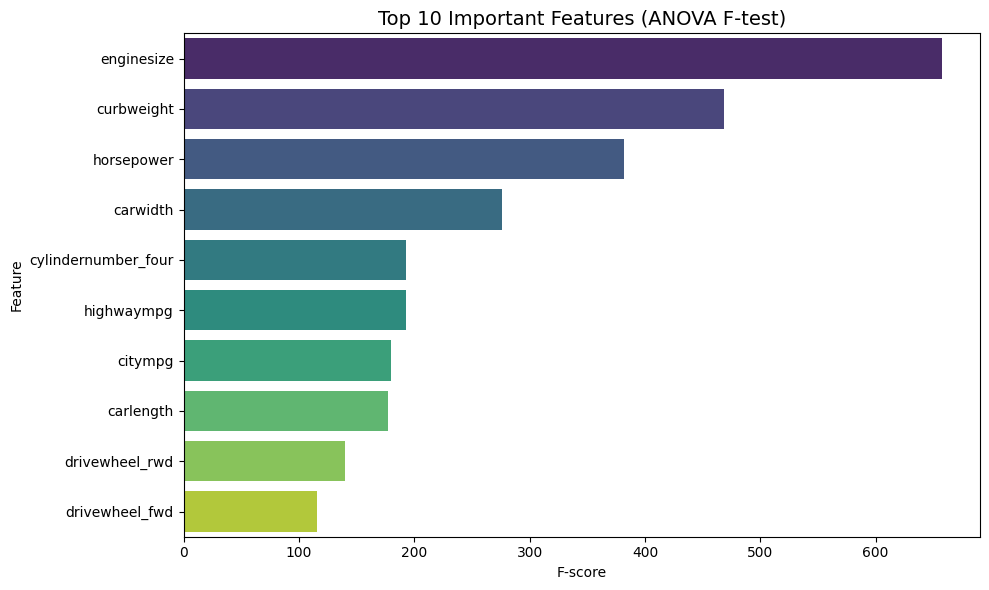

In [37]:
# Bar Chart plotting
top_features = feature_scores.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='F-score', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features (ANOVA F-test)', fontsize=14)
plt.xlabel('F-score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## The ANOVA F-test (f_regression) is ideal for this project

1. The target variable (price) is continuous, and ANOVA is specifically designed for evaluating the relationship between continuous targets and independent variables.

2. It helps identify which features significantly influence car prices by measuring how much variance in the price can be explained by each feature.

3. This supports the business goal of understanding key factors affecting car pricing in the US market.

Thus, ANOVA F-test provides a statistically sound way to perform feature selection in a regression problem like this.



## 5. Hyperparameter Tuning

In [39]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

#Initialize the model
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2',
                           verbose=1)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [40]:
# Best model after tuning
best_rf = grid_search.best_estimator_

# Predict using the tuned model
tuned_preds = best_rf.predict(X_test)

# Evaluate performance after tuning
tuned_r2 = r2_score(y_test, tuned_preds)

# Step 8: Print the results
print("Best Hyperparameters:", grid_search.best_params_)
print("R2 Score after tuning:", round(tuned_r2, 4))

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score after tuning: 0.9592
